# klimbB Challenge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',100)

import warnings
warnings.filterwarnings('ignore')

print('Done')

Done


In [2]:
df1 = pd.read_excel('foyer_product_analyst_feature_user_data.xlsx', sheet_name = 'Table 1')
df2 = pd.read_excel('foyer_product_analyst_feature_user_data.xlsx', sheet_name = 'Table 2')
df3 = pd.read_excel('foyer_product_analyst_feature_user_data.xlsx', sheet_name = 'Table 3')

In [3]:
df1.rename(columns = {'Week':'week', 'Product Feature':'product_feature', 'Time Spent on App':'time_spent'}, inplace = True)
df1

,week,product_feature,age,gender,user_id,time_spent,event_flag
0,Week 1,Article Summarizer,30-34,M,1,569,No Event
1,Week 11,YouTube Summarizer,30-34,M,1,452,No Event
2,Week 21,LinkedIn Post Creator,30-34,M,1,816,No Event
3,Week 8,Website Chat Bot,30-34,M,1,840,No Event
4,Week 18,Gmail Composer,30-34,M,1,693,No Event
...,...,...,...,...,...,...,...
1238,Week 16,YouTube Summarizer,40-44,M,4046,632,Football World Cup
1239,Week 16,LinkedIn Post Creator,30-34,F,4047,535,Football World Cup
1240,Week 16,Website Chat Bot,40-44,F,4048,404,Football World Cup
1241,Week 16,Gmail Composer,35-39,M,4049,862,Football World Cup


In [4]:
df2.rename(columns = {'Product Feature':'product_feature', 'Cost Per Week':'cost_per_week'}, inplace = True)
df2

,product_feature,cost_per_week
0,Article Summarizer,10
1,YouTube Summarizer,15
2,LinkedIn Post Creator,20
3,Website Chat Bot,10
4,Gmail Composer,10
5,Document Summarizer,15


In [5]:
df3.rename(columns = {'Entry Channel':'entry_channel', 'Cost To Aquire Customer':'cost_to_acquire_customer'}, inplace = True)
df3

,user_id,entry_channel,cost_to_acquire_customer
0,1,Google Ad,13
1,2,LinkedIn Ad,16
2,3,Organic,0
3,4,Organic,0
4,5,Facebook Ad,17
...,...,...,...
413,4046,Organic,0
414,4047,Facebook Ad,14
415,4048,Google Ad,15
416,4049,LinkedIn Ad,12


In [6]:
a = df1.groupby(['week','product_feature','user_id','gender','age'], as_index = 0)['time_spent'].sum()
df = pd.merge(a, df2, how = 'left', on = 'product_feature')
df

,week,product_feature,user_id,gender,age,time_spent,cost_per_week
0,Week 1,Article Summarizer,1,M,30-34,569,10
1,Week 1,Article Summarizer,2,M,30-34,460,10
2,Week 1,Article Summarizer,6,M,30-34,388,10
3,Week 1,Article Summarizer,9,M,30-34,658,10
4,Week 1,Article Summarizer,190,M,35-39,470,10
...,...,...,...,...,...,...,...
1167,Week 9,YouTube Summarizer,477,M,45-49,826,15
1168,Week 9,YouTube Summarizer,489,M,45-49,173,15
1169,Week 9,YouTube Summarizer,803,F,35-39,498,15
1170,Week 9,YouTube Summarizer,943,F,40-44,204,15


#### Time Spent & Total Cost per Week
* Product Feature
* Gender
* Age Buckets

In [7]:
new1 = df.groupby(['product_feature'], as_index = 0).agg({'time_spent':['sum','median'], 'cost_per_week':'sum', 'user_id':['count',pd.Series.nunique]})
new1.columns = ['product_feature','total_time_spent','median_time_spent','total_cost','unique_users_weekly','distinct_users']
new1['returning_users_percent'] = ((1 - new1.distinct_users / new1.unique_users_weekly) * 100)
new1 = new1.round(1)
new1

,product_feature,total_time_spent,median_time_spent,total_cost,unique_users_weekly,distinct_users,returning_users_percent
0,Article Summarizer,116683,500,2130,213,168,21.1
1,Document Summarizer,54562,487,1635,109,92,15.6
2,Gmail Composer,120208,550,2130,213,171,19.7
3,LinkedIn Post Creator,122300,552,4240,212,172,18.9
4,Website Chat Bot,123152,572,2130,213,169,20.7
5,YouTube Summarizer,118208,513,3180,212,170,19.8


In [8]:
new2 = df.groupby(['gender'], as_index = 0).agg({'time_spent':['sum','median'], 'cost_per_week':['sum','mean'], 'user_id':['count',pd.Series.nunique]})
new2.columns = ['gender','total_time_spent','median_time_spent','total_cost','mean_cost','unique_users_weekly','distinct_users']
new2['returning_users_percent'] = ((1 - new2.distinct_users / new2.unique_users_weekly) * 100)
new2 = new2.round(1)
new2

,gender,total_time_spent,median_time_spent,total_cost,mean_cost,unique_users_weekly,distinct_users,returning_users_percent
0,F,171161,485,4480,13.1,341,189,44.6
1,M,483952,552,10965,13.2,831,229,72.4


In [9]:
new3 = df.groupby(['age'], as_index = 0).agg({'time_spent':['sum','median'], 'cost_per_week':['sum','mean'], 'user_id':['count',pd.Series.nunique]})
new3.columns = ['age','total_time_spent','median_time_spent','total_cost','mean_cost','unique_users_weekly','distinct_users']
new3['returning_users_percent'] = ((1 - new3.distinct_users / new3.unique_users_weekly) * 100)
new3 = new3.round(1)
new3

,age,total_time_spent,median_time_spent,total_cost,mean_cost,unique_users_weekly,distinct_users,returning_users_percent
0,30-34,242041,525.0,5915,13.2,449,116,74.2
1,35-39,124901,528.5,3020,13.0,232,101,56.5
2,40-44,179225,555.5,3720,13.3,280,101,63.9
3,45-49,108946,518.0,2790,13.2,211,100,52.6


#### SQL Code

In [10]:
df_ = pysqldf("""
                SELECT a.*, df2.cost_per_week
                FROM ( SELECT week, product_feature, user_id, gender, age, SUM(time_spent) AS time_spent FROM df1 GROUP BY 1,2,3,4,5 ) a
                LEFT JOIN df2 ON a.product_feature = df2.product_feature
            """)
# display(df_)

new1_ = pysqldf("""
                  SELECT product_feature, SUM(time_spent) AS total_time_spent,
                      AVG(CASE WHEN (cou%2 = 1 AND rownum = cou/2 +1) OR (cou%2 = 0 AND rownum IN (cou/2,cou/2+1)) THEN time_spent END) AS median_time_spent,
                      SUM(cost_per_week) AS total_cost, COUNT(user_id) AS unique_users_weekly,
                      COUNT(DISTINCT user_id) AS distinct_users, ROUND((1 - 1.0*COUNT(DISTINCT user_id)/COUNT(user_id))*100,1) AS returning_users_percent
                  FROM ( SELECT *, ROW_NUMBER() OVER (PARTITION BY product_feature ORDER BY time_spent) AS rownum, COUNT(*) OVER(PARTITION BY product_feature) AS cou FROM df_)
                  GROUP BY product_feature
            """)
# display(new1_)

new2_ = pysqldf("""
                  SELECT gender, SUM(time_spent) AS total_time_spent,
                      AVG(CASE WHEN (cou%2 = 1 AND rownum = cou/2 +1) OR (cou%2 = 0 AND rownum IN (cou/2,cou/2+1)) THEN time_spent END) AS median_time_spent,
                      SUM(cost_per_week) AS total_cost, ROUND(AVG(cost_per_week),1) AS mean_cost, COUNT(user_id) AS unique_users_weekly,
                      COUNT(DISTINCT user_id) AS distinct_users, ROUND((1 - 1.0*COUNT(DISTINCT user_id)/COUNT(user_id))*100,1) AS returning_users_percent
                  FROM ( SELECT *, ROW_NUMBER() OVER (PARTITION BY gender ORDER BY time_spent) AS rownum, COUNT(*) OVER(PARTITION BY gender) AS cou FROM df_ )
                  GROUP BY gender
            """)
# display(new2_)

new3_ = pysqldf("""
                  SELECT age, SUM(time_spent) AS total_time_spent,
                      AVG(CASE WHEN (cou%2 = 1 AND rownum = cou/2 +1) OR (cou%2 = 0 AND rownum IN (cou/2,cou/2+1)) THEN time_spent END) AS median_time_spent,
                      SUM(cost_per_week) AS total_cost, ROUND(AVG(cost_per_week),1) AS mean_cost, COUNT(user_id) AS unique_users_weekly,
                      COUNT(DISTINCT user_id) AS distinct_users, ROUND((1 - 1.0*COUNT(DISTINCT user_id)/COUNT(user_id))*100,1) AS returning_users_percent
                  FROM ( SELECT *, ROW_NUMBER() OVER (PARTITION BY age ORDER BY time_spent) AS rownum, COUNT(*) OVER(PARTITION BY age) AS cou FROM df_ )
                  GROUP BY age
            """)
# display(new3_)

#### Pie Plots

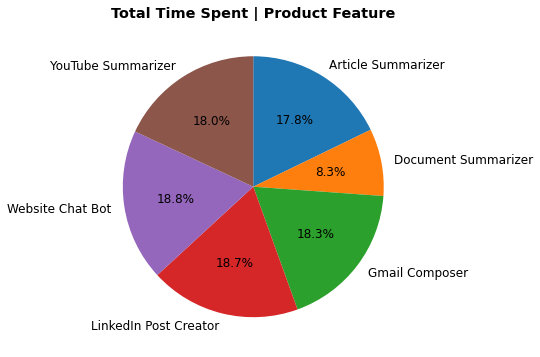

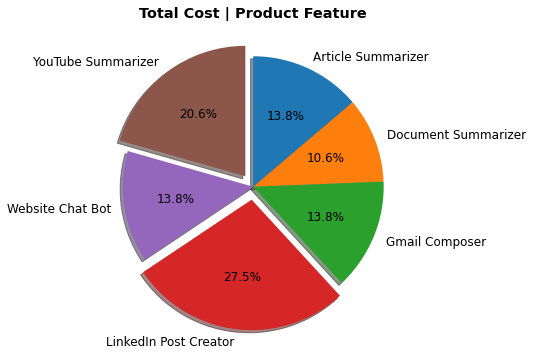

In [11]:
plt.figure(figsize=(9,6))
plt.pie(new1['total_time_spent'], labels = new1['product_feature'], autopct='%1.1f%%', startangle = 90, counterclock = False, radius = 1, textprops = {'size':'large'})
plt.title('Total Time Spent | Product Feature', fontdict = {'fontsize':'x-large','fontweight':'bold'})
plt.savefig('klimbB images/fig1a.jpg', bbox_inches='tight', pad_inches=0.3)

plt.figure(figsize=(9,6))
plt.pie(new1['total_cost'], labels = new1['product_feature'], autopct='%1.1f%%', startangle = 90, counterclock = False, radius = 1, textprops = {'size':'large'}, explode = (0,0,0,0.1,0,0.1), shadow = True)
plt.title('Total Cost | Product Feature', fontdict = {'fontsize':'x-large', 'fontweight':'bold'})
plt.savefig('klimbB images/fig1b.jpg', bbox_inches='tight', pad_inches=0.5)

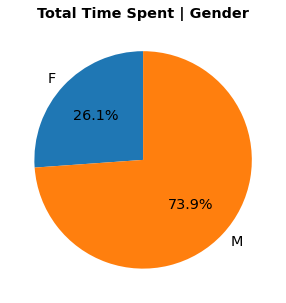

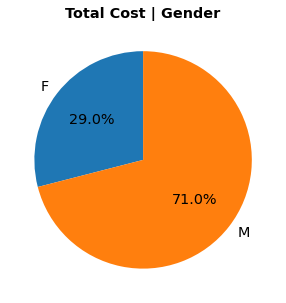

In [12]:
plt.figure(figsize=(5,5))
plt.pie(new2['total_time_spent'], labels = new2['gender'], autopct='%1.1f%%', startangle = 90, counterclock = True, radius = 1, textprops = {'size':'x-large'})
plt.title('Total Time Spent | Gender', fontdict = {'fontsize':'x-large','fontweight':'bold'})
plt.savefig('klimbB images/fig2a.jpg', bbox_inches='tight', pad_inches=0.3)

plt.figure(figsize=(5,5))
plt.pie(new2['total_cost'], labels = new2['gender'], autopct='%1.1f%%', startangle = 90, counterclock = True, radius = 1, textprops = {'size':'x-large'})
plt.title('Total Cost | Gender', fontdict = {'fontsize':'x-large','fontweight':'bold'})
plt.savefig('klimbB images/fig2b.jpg', bbox_inches='tight', pad_inches=0.3)

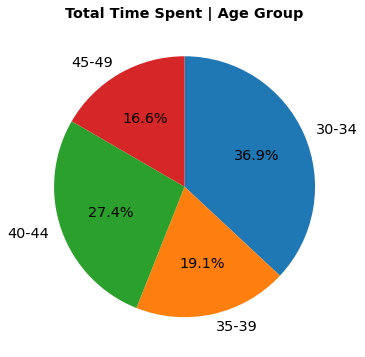

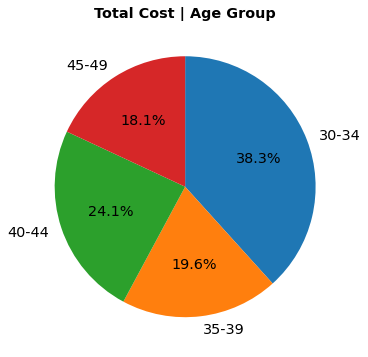

In [13]:
plt.figure(figsize=(6,6))
plt.pie(new3['total_time_spent'], labels = new3['age'], autopct='%1.1f%%', startangle = 90, counterclock = False, radius = 1, textprops = {'size':'x-large'})
plt.title('Total Time Spent | Age Group', fontdict = {'fontsize':'x-large','fontweight':'bold'})
plt.savefig('klimbB images/fig3a.jpg', bbox_inches='tight', pad_inches=0.3)

plt.figure(figsize=(6,6))
plt.pie(new3['total_cost'], labels = new3['age'], autopct='%1.1f%%', startangle = 90, counterclock = False, radius = 1, textprops = {'size':'x-large'})
plt.title('Total Cost | Age Group', fontdict = {'fontsize':'x-large','fontweight':'bold'})
plt.savefig('klimbB images/fig3b.jpg', bbox_inches='tight', pad_inches=0.3)

#### Bar Charts

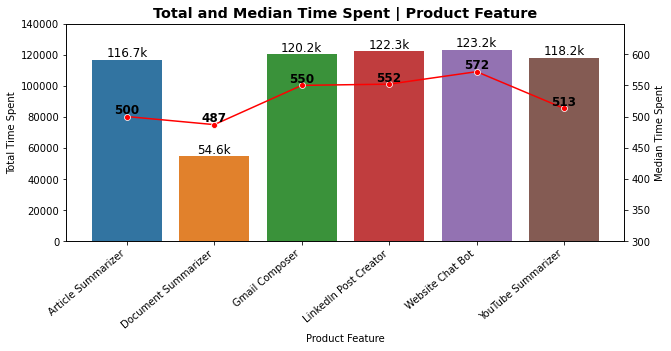

In [14]:
plt.figure(figsize=(10,4))

# Bar plot
ax1 = sns.barplot(data = new1, x = 'product_feature', y = 'total_time_spent', ci = None)

# Secondary axis
ax2 = ax1.twinx()

# Line plot for median
sns.lineplot(data = new1, x = 'product_feature', y = 'median_time_spent', color = 'red', marker = 'o', ax = ax2)


plt.title('Total and Median Time Spent | Product Feature', fontdict = {'fontsize':'x-large','fontweight':'bold'})
ax1.set_xlabel('Product Feature')
ax1.set_ylabel('Total Time Spent')
ax2.set_ylabel('Median Time Spent')

ax1.set_xticklabels(new1['product_feature'], rotation=40, ha='right')
ax1.set_ylim(0,140000)
ax2.set_ylim(300,649)

for index,row in new1.iterrows():
    ax1.text(index, row['total_time_spent'], str(round(row['total_time_spent']/1000, 1))+'k', ha='center', va='bottom', fontsize=12)
    ax2.text(index, row['median_time_spent'], str(row['median_time_spent']), ha='center', va='bottom', fontsize=12, fontdict = {'fontweight':'bold'})

plt.savefig('klimbB images/fig1c.jpg', bbox_inches='tight', pad_inches=0.3)

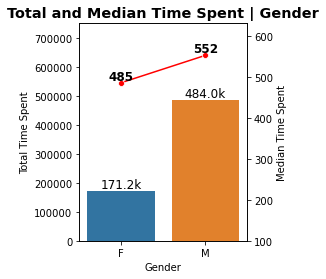

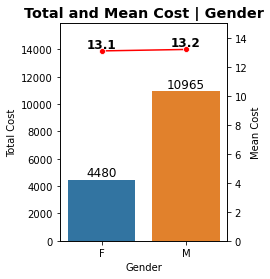

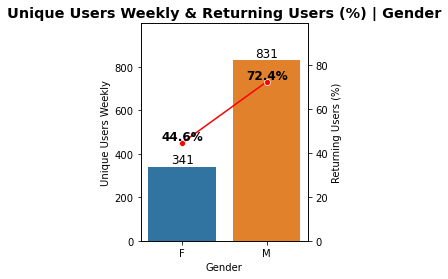

In [15]:
plt.figure(figsize=(3,4))

ax1 = sns.barplot(data = new2, x = 'gender', y = 'total_time_spent', ci = None)
ax2 = ax1.twinx()
sns.lineplot(data = new2, x = 'gender', y = 'median_time_spent', color = 'red', marker = 'o', ax = ax2)

plt.title('Total and Median Time Spent | Gender', fontdict = {'fontsize':'x-large','fontweight':'bold'})
ax1.set_xlabel('Gender')
ax1.set_ylabel('Total Time Spent')
ax2.set_ylabel('Median Time Spent')

ax1.set_ylim(0,750000)
ax2.set_ylim(100,630)

for index,row in new2.iterrows():
    ax1.text(index, row['total_time_spent'], str(round(row['total_time_spent']/1000, 1))+'k', ha='center', va='bottom', fontsize=12)
    ax2.text(index, row['median_time_spent'], str(row['median_time_spent']), ha='center', va='bottom', fontsize=12, fontdict = {'fontweight':'bold'})

plt.savefig('klimbB images/fig2c.jpg', bbox_inches='tight', pad_inches=0.3)




plt.figure(figsize=(3,4))

ax1 = sns.barplot(data = new2, x = 'gender', y = 'total_cost', ci = None)
ax2 = ax1.twinx()
sns.lineplot(data = new2, x = 'gender', y = 'mean_cost', color = 'red', marker = 'o', ax = ax2)

plt.title('Total and Mean Cost | Gender', fontdict = {'fontsize':'x-large','fontweight':'bold'})
ax1.set_xlabel('Gender')
ax1.set_ylabel('Total Cost')
ax2.set_ylabel('Mean Cost')

ax1.set_ylim(0,15900)
ax2.set_ylim(0,15)

for index,row in new2.iterrows():
    ax1.text(index, row['total_cost'], str(row['total_cost']), ha='center', va='bottom', fontsize=12)
    ax2.text(index, row['mean_cost'], str(row['mean_cost']), ha='center', va='bottom', fontsize=12, fontdict = {'fontweight':'bold'})

plt.savefig('klimbB images/fig2d.jpg', bbox_inches='tight', pad_inches=0.3)




plt.figure(figsize=(3,4))

ax1 = sns.barplot(data = new2, x = 'gender', y = 'unique_users_weekly', ci = None)
ax2 = ax1.twinx()
sns.lineplot(data = new2, x = 'gender', y = 'returning_users_percent', color = 'red', marker = 'o', ax = ax2)

plt.title('Unique Users Weekly & Returning Users (%) | Gender', fontdict = {'fontsize':'x-large','fontweight':'bold'})
ax1.set_xlabel('Gender')
ax1.set_ylabel('Unique Users Weekly')
ax2.set_ylabel('Returning Users (%)')

ax1.set_ylim(0,999)
ax2.set_ylim(0,99)

for index,row in new2.iterrows():
    ax1.text(index, row['unique_users_weekly'], str(row['unique_users_weekly']), ha='center', va='bottom', fontsize=12)
    ax2.text(index, row['returning_users_percent'], str(row['returning_users_percent'])+'%', ha='center', va='bottom', fontsize=12, fontdict = {'fontweight':'bold'})

plt.savefig('klimbB images/fig2e.jpg', bbox_inches='tight', pad_inches=0.3)

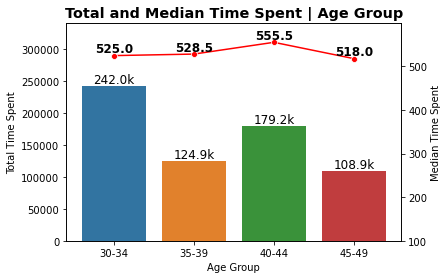

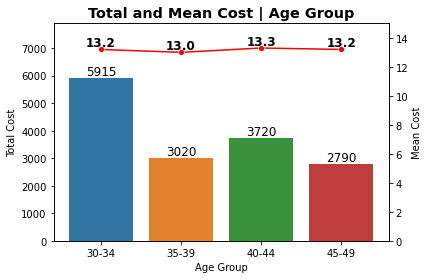

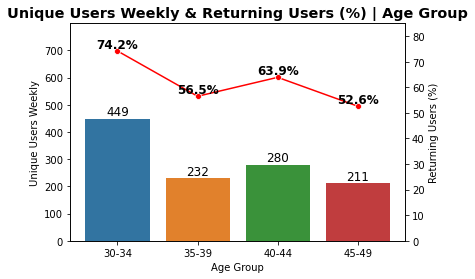

In [16]:
plt.figure(figsize=(6,4))

ax1 = sns.barplot(data = new3, x = 'age', y = 'total_time_spent', ci = None)
ax2 = ax1.twinx()
sns.lineplot(data = new3, x = 'age', y = 'median_time_spent', color = 'red', marker = 'o', ax = ax2)

plt.title('Total and Median Time Spent | Age Group', fontdict = {'fontsize':'x-large','fontweight':'bold'})
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Total Time Spent')
ax2.set_ylabel('Median Time Spent')

ax1.set_ylim(0,340000)
ax2.set_ylim(100,599)

for index,row in new3.iterrows():
    ax1.text(index, row['total_time_spent'], str(round(row['total_time_spent']/1000, 1))+'k', ha='center', va='bottom', fontsize=12)
    ax2.text(index, row['median_time_spent'], str(row['median_time_spent']), ha='center', va='bottom', fontsize=12, fontdict = {'fontweight':'bold'})

plt.savefig('klimbB images/fig3c.jpg', bbox_inches='tight', pad_inches=0.3)




plt.figure(figsize=(6,4))

ax1 = sns.barplot(data = new3, x = 'age', y = 'total_cost', ci = None)
ax2 = ax1.twinx()
sns.lineplot(data = new3, x = 'age', y = 'mean_cost', color = 'red', marker = 'o', ax = ax2)

plt.title('Total and Mean Cost | Age Group', fontdict = {'fontsize':'x-large','fontweight':'bold'})
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Total Cost')
ax2.set_ylabel('Mean Cost')

ax1.set_ylim(0,7900)
ax2.set_ylim(0,15)

for index,row in new3.iterrows():
    ax1.text(index, row['total_cost'], str(row['total_cost']), ha='center', va='bottom', fontsize=12)
    ax2.text(index, row['mean_cost'], str(row['mean_cost']), ha='center', va='bottom', fontsize=12, fontdict = {'fontweight':'bold'})

plt.savefig('klimbB images/fig3d.jpg', bbox_inches='tight', pad_inches=0.3)




plt.figure(figsize=(6,4))

ax1 = sns.barplot(data = new3, x = 'age', y = 'unique_users_weekly', ci = None)
ax2 = ax1.twinx()
sns.lineplot(data = new3, x = 'age', y = 'returning_users_percent', color = 'red', marker = 'o', ax = ax2)

plt.title('Unique Users Weekly & Returning Users (%) | Age Group', fontdict = {'fontsize':'x-large','fontweight':'bold'})
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Unique Users Weekly')
ax2.set_ylabel('Returning Users (%)')

ax1.set_ylim(0,799)
ax2.set_ylim(0,85)

for index,row in new3.iterrows():
    ax1.text(index, row['unique_users_weekly'], str(row['unique_users_weekly']), ha='center', va='bottom', fontsize=12)
    ax2.text(index, row['returning_users_percent'], str(row['returning_users_percent'])+'%', ha='center', va='bottom', fontsize=12, fontdict = {'fontweight':'bold'})

plt.savefig('klimbB images/fig3e.jpg', bbox_inches='tight', pad_inches=0.3)

#### Retention Rate (10 Week Cohorts)
* Product Feature
* Gender
* Age Buckets

In [17]:
dfm = a.copy()
dfm['week_num'] = (dfm['week'].str[5:].astype(int) - 1) // 10 + 1
dfm['cohort_week'] = dfm.groupby(['product_feature','user_id'])['week_num'].transform(min)
dfm['period_num'] = dfm['week_num'] - dfm['cohort_week']
name_map = {1: 'Week 01-10', 2: 'Week 11-20', 3: 'Week 21-30'}
dfm['cohort_week'] = dfm['cohort_week'].replace(name_map)
dfm

,week,product_feature,user_id,gender,age,time_spent,week_num,cohort_week,period_num
0,Week 1,Article Summarizer,1,M,30-34,569,1,Week 01-10,0
1,Week 1,Article Summarizer,2,M,30-34,460,1,Week 01-10,0
2,Week 1,Article Summarizer,6,M,30-34,388,1,Week 01-10,0
3,Week 1,Article Summarizer,9,M,30-34,658,1,Week 01-10,0
4,Week 1,Article Summarizer,190,M,35-39,470,1,Week 01-10,0
...,...,...,...,...,...,...,...,...,...
1167,Week 9,YouTube Summarizer,477,M,45-49,826,1,Week 01-10,0
1168,Week 9,YouTube Summarizer,489,M,45-49,173,1,Week 01-10,0
1169,Week 9,YouTube Summarizer,803,F,35-39,498,1,Week 01-10,0
1170,Week 9,YouTube Summarizer,943,F,40-44,204,1,Week 01-10,0


In [18]:
cut_dict1 = {}
uniq1 = dfm.product_feature.unique()
print('PRODUCT FEATURE\n',uniq1)

for i in range(dfm.product_feature.nunique()):
    cut_dict1[f"cut{i+1}"] = dfm[dfm.product_feature == uniq1[i]]
    
for key,value in cut_dict1.items():
    globals()[key] = value

    
pt_dict1 = {}

for i, (key,value) in enumerate(cut_dict1.items(), start = 1):
    pt_dict1[f"pt{i}"] = value.pivot_table(index = 'cohort_week', columns = 'period_num', values = 'user_id', aggfunc = lambda x:len(x.unique())).reset_index().rename_axis(None,axis=1)
    
for key,value in pt_dict1.items():
    globals()[key] = value


pt_list1 = [pt1,pt2,pt3,pt4,pt5,pt6]

for x in pt_list1:
    x.columns = ['cohort_week','cohort_size','1','2']
    x['1'] = round(100*x['1']/x['cohort_size'],1)
    x['2'] = round(100*x['2']/x['cohort_size'],1)
    
    n = len(x.columns)
    for i in range(n):
        j = n - i - 1
        if pd.isna(x.iloc[i,j]):
            x.iat[i,j] = 0
        if j < n - 2:
            break
    x = x.fillna('')
    x.cohort_size = x.cohort_size.astype(int)
    display(x)

PRODUCT FEATURE
 ['Article Summarizer' 'Document Summarizer' 'Gmail Composer'
 'LinkedIn Post Creator' 'Website Chat Bot' 'YouTube Summarizer']


,cohort_week,cohort_size,1,2
0,Week 01-10,78,14.1,7.7
1,Week 11-20,76,0,
2,Week 21-30,14,,


,cohort_week,cohort_size,1,2
0,Week 01-10,41,9.8,2.4
1,Week 11-20,40,5,
2,Week 21-30,11,,


,cohort_week,cohort_size,1,2
0,Week 01-10,96,5.2,6.2
1,Week 11-20,61,3.3,
2,Week 21-30,14,,


,cohort_week,cohort_size,1,2
0,Week 01-10,87,11.5,9.2
1,Week 11-20,71,0,
2,Week 21-30,14,,


,cohort_week,cohort_size,1,2
0,Week 01-10,79,5.1,10.1
1,Week 11-20,72,1.4,
2,Week 21-30,18,,


,cohort_week,cohort_size,1,2
0,Week 01-10,93,12.9,6.5
1,Week 11-20,61,3.3,
2,Week 21-30,16,,


In [19]:
cut_dict2 = {}
uniq2 = dfm.gender.unique()
print('GENDER\n',uniq2)

for i in range(dfm.gender.nunique()):
    cut_dict2[f"cut{i+1}"] = dfm[dfm.gender == uniq2[i]]
    
for key,value in cut_dict2.items():
    globals()[key] = value

    
pt_dict2 = {}

for i, (key,value) in enumerate(cut_dict2.items(), start = 1):
    pt_dict2[f"pt{i}"] = value.pivot_table(index = 'cohort_week', columns = 'period_num', values = 'user_id', aggfunc = lambda x:len(x.unique())).reset_index().rename_axis(None,axis=1)
    
for key,value in pt_dict2.items():
    globals()[key] = value


pt_list2 = [pt1,pt2]

for x in pt_list2:
    x.columns = ['cohort_week','cohort_size','1','2']
    x['1'] = round(100*x['1']/x['cohort_size'],1)
    x['2'] = round(100*x['2']/x['cohort_size'],1)
    
    n = len(x.columns)
    for i in range(n):
        j = n - i - 1
        if pd.isna(x.iloc[i,j]):
            x.iat[i,j] = 0
        if j < n - 2:
            break
    x = x.fillna('')
    x.cohort_size = x.cohort_size.astype(int)
    display(x)


GENDER
 ['M' 'F']


,cohort_week,cohort_size,1,2
0,Week 01-10,185,10.8,9.2
1,Week 11-20,178,3.4,
2,Week 21-30,44,,


,cohort_week,cohort_size,1,2
0,Week 01-10,149,2,4
1,Week 11-20,145,0,
2,Week 21-30,34,,


In [20]:
cut_dict3 = {}
uniq3 = dfm.age.unique()
print('AGE GROUP\n',uniq3)

for i in range(dfm.age.nunique()):
    cut_dict3[f"cut{i+1}"] = dfm[dfm.age == uniq3[i]]
    
for key,value in cut_dict3.items():
    globals()[key] = value

    
pt_dict3 = {}

for i, (key,value) in enumerate(cut_dict3.items(), start = 1):
    pt_dict3[f"pt{i}"] = value.pivot_table(index = 'cohort_week', columns = 'period_num', values = 'user_id', aggfunc = lambda x:len(x.unique())).reset_index().rename_axis(None,axis=1)
    
for key,value in pt_dict3.items():
    globals()[key] = value

    
pt_list3 = [pt1,pt2,pt3,pt4]

for x in pt_list3:
    try:
        x.columns = ['cohort_week','cohort_size','1','2']
    except:
        x.columns = ['cohort_week','cohort_size','1']
        list2 = [0,None,None]
        x['2'] = list2
    x['1'] = round(100*x['1']/x['cohort_size'],1)
    x['2'] = round(100*x['2']/x['cohort_size'],1)
    
    n = len(x.columns)
    for i in range(n):
        j = n - i - 1
        if pd.isna(x.iloc[i,j]):
            x.iat[i,j] = 0
        if j < n - 2:
            break
    x = x.fillna('')
    x.cohort_size = x.cohort_size.astype(int)
    display(x)


AGE GROUP
 ['30-34' '35-39' '40-44' '45-49']


,cohort_week,cohort_size,1,2
0,Week 01-10,97,16.5,14.4
1,Week 11-20,87,5.7,
2,Week 21-30,21,,


,cohort_week,cohort_size,1,2
0,Week 01-10,80,2.5,1.2
1,Week 11-20,80,0,
2,Week 21-30,19,,


,cohort_week,cohort_size,1,2
0,Week 01-10,78,5.1,6.4
1,Week 11-20,79,1.3,
2,Week 21-30,19,,


,cohort_week,cohort_size,1,2
0,Week 01-10,79,1.3,3.8
1,Week 11-20,77,0,
2,Week 21-30,19,,


#### SQL Code

In [21]:
dfm_ = pysqldf("""
                SELECT week, product_feature, user_id, gender, age, time_spent, week_num,
                    CASE WHEN cohort = 1 THEN "Week 01-10" WHEN cohort = 2 THEN "Week 11-20" ELSE "Week 21-30" END AS cohort_week, (week_num - cohort) AS period_num
                FROM (
                    SELECT *, MIN(week_num) OVER (PARTITION BY product_feature, user_id) AS cohort
                    FROM ( SELECT *, (CAST(SUBSTR(week,6,LENGTH(week)-5) AS INT) - 1)/10 + 1 AS week_num FROM a )
                )
            """)
# display(dfm_)

pt1_ = pysqldf("""
                SELECT product_feature, cohort_week, COUNT(DISTINCT user_id) AS cohort_size,
                    ROUND(100.0 * SUM(CASE WHEN period_num = 1 THEN 1 END) / COUNT(DISTINCT user_id), 1) AS [1],
                    ROUND(100.0 * SUM(CASE WHEN period_num = 2 THEN 1 END) / COUNT(DISTINCT user_id), 1) AS [2]
                FROM ( SELECT DISTINCT product_feature, cohort_week, user_id, period_num FROM dfm_ )
                -- WHERE product_feature = 'Article Summarizer'
                GROUP BY product_feature, cohort_week
                ORDER BY product_feature, cohort_week
            """)
pt1_ = pt1_.fillna('')
# display(pt1_)

pt2_ = pysqldf("""
                SELECT gender, cohort_week, COUNT(DISTINCT user_id) AS cohort_size,
                    ROUND(100.0 * SUM(CASE WHEN period_num = 1 THEN 1 END) / COUNT(DISTINCT user_id), 1) AS [1],
                    ROUND(100.0 * SUM(CASE WHEN period_num = 2 THEN 1 END) / COUNT(DISTINCT user_id), 1) AS [2]
                FROM ( SELECT DISTINCT gender, cohort_week, user_id, period_num FROM dfm_ )
                -- WHERE gender = 'M'
                GROUP BY gender, cohort_week
                ORDER BY gender, cohort_week
            """)
pt2_ = pt2_.fillna('')
# display(pt2_)

pt3_ = pysqldf("""
                SELECT age, cohort_week, COUNT(DISTINCT user_id) AS cohort_size,
                    ROUND(100.0 * SUM(CASE WHEN period_num = 1 THEN 1 END) / COUNT(DISTINCT user_id), 1) AS [1],
                    ROUND(100.0 * SUM(CASE WHEN period_num = 2 THEN 1 END) / COUNT(DISTINCT user_id), 1) AS [2]
                FROM ( SELECT DISTINCT age, cohort_week, user_id, period_num FROM dfm_ )
                -- WHERE age = '30-34'
                GROUP BY age, cohort_week
                ORDER BY age, cohort_week
            """)
pt3_ = pt3_.fillna('')
# display(pt3_)

### Top & Bottom Customers by Total Per Week Cost
* Highest Engagement
* 2nd Highest Engagement

In [22]:
b1 = df.copy()
b1 = b1.groupby(['product_feature','user_id'], as_index = 0)['cost_per_week'].sum()
b1.columns = ['product_feature','user_id','total_cost_per_week']
# b1['top'] = b1.groupby(['product_feature'])['total_cost_per_week'].rank(ascending = False, method = 'min')
# b1['bottom'] = b1.groupby(['product_feature'])['total_cost_per_week'].rank(ascending = True, method = 'min')
b1['top'] = b1.sort_values(['total_cost_per_week','user_id'], ascending = (0,1)).groupby(['product_feature'])['total_cost_per_week'].cumcount()+1
b1['bottom'] = b1.sort_values(['total_cost_per_week','user_id'], ascending = (1,1)).groupby(['product_feature'])['total_cost_per_week'].cumcount()+1
b1['customer_rank'] = np.where(b1.top == 1, 'Top', np.where(b1.bottom == 1, 'Bottom', None))
b1 = b1[~b1.customer_rank.isna()][['product_feature','user_id','customer_rank']].sort_values(['product_feature','customer_rank','user_id'], ascending = (1,0,1)).reset_index(drop = True)
# display(b1)

b2 = df.copy()
b2 = b2[b2.user_id.isin(b1.user_id)]
b2 = b2.groupby(['user_id','product_feature'], as_index = 0)['time_spent'].sum()
b2.columns = ['user_id','engaged_product','total_time_spent']
# b2['rank_'] = b2.groupby(['user_id'])['total_time_spent'].rank(ascending = False, method = 'min')
b2['rank_'] = b2.sort_values(['total_time_spent','engaged_product'], ascending = (0,1)).groupby(['user_id'])['total_time_spent'].cumcount()+1

b3 = b2[b2.rank_ == 1][['user_id','engaged_product']].sort_values(['user_id','engaged_product'])
b3.columns = ['user_id','highest_engagement']
b4 = b2[b2.rank_ == 2][['user_id','engaged_product']].sort_values(['user_id','engaged_product'])
b4.columns = ['user_id','2nd_highest_engagement']

c1 = pd.merge(b1, b3, how = 'left', on = 'user_id')
display(c1)

c2 = pd.merge(b1, b4, how = 'left', on = 'user_id')
display(c2)

,product_feature,user_id,customer_rank,highest_engagement
0,Article Summarizer,3002,Top,LinkedIn Post Creator
1,Article Summarizer,15,Bottom,Website Chat Bot
2,Document Summarizer,3002,Top,LinkedIn Post Creator
3,Document Summarizer,4,Bottom,YouTube Summarizer
4,Gmail Composer,3002,Top,LinkedIn Post Creator
5,Gmail Composer,17,Bottom,Website Chat Bot
6,LinkedIn Post Creator,3002,Top,LinkedIn Post Creator
7,LinkedIn Post Creator,16,Bottom,Website Chat Bot
8,Website Chat Bot,3002,Top,LinkedIn Post Creator
9,Website Chat Bot,19,Bottom,Website Chat Bot


,product_feature,user_id,customer_rank,2nd_highest_engagement
0,Article Summarizer,3002,Top,Article Summarizer
1,Article Summarizer,15,Bottom,YouTube Summarizer
2,Document Summarizer,3002,Top,Article Summarizer
3,Document Summarizer,4,Bottom,LinkedIn Post Creator
4,Gmail Composer,3002,Top,Article Summarizer
5,Gmail Composer,17,Bottom,Article Summarizer
6,LinkedIn Post Creator,3002,Top,Article Summarizer
7,LinkedIn Post Creator,16,Bottom,Gmail Composer
8,Website Chat Bot,3002,Top,Article Summarizer
9,Website Chat Bot,19,Bottom,Article Summarizer


#### SQL Code 

In [23]:
b1_ = pysqldf("""
                SELECT product_feature, user_id, CASE WHEN top = 1 THEN 'Top' WHEN bottom = 1 THEN 'Bottom' END AS customer_rank
                FROM (
                    -- SELECT *, RANK() OVER (PARTITION BY product_feature ORDER BY total_cost_per_week DESC) AS top, RANK() OVER (PARTITION BY product_feature ORDER BY total_cost_per_week) AS bottom
                    SELECT *, ROW_NUMBER() OVER (PARTITION BY product_feature ORDER BY total_cost_per_week DESC) AS top, ROW_NUMBER() OVER (PARTITION BY product_feature ORDER BY total_cost_per_week) AS bottom
                    FROM ( SELECT product_feature, user_id, SUM(cost_per_week) AS total_cost_per_week FROM df_ GROUP BY product_feature, user_id )
                )
                WHERE CASE WHEN top = 1 THEN 'Top' WHEN bottom = 1 THEN 'Bottom' END IS NOT NULL
                ORDER BY product_feature, customer_rank DESC
            """)
# display(b1_)

b2_ = pysqldf("""
                -- SELECT *, RANK() OVER (PARTITION BY user_id ORDER BY total_time_spent DESC) AS rank_
                SELECT *, ROW_NUMBER() OVER (PARTITION BY user_id ORDER BY total_time_spent DESC) AS rank_
                FROM ( SELECT user_id, product_feature AS engaged_product, SUM(time_spent) AS total_time_spent
                        FROM df_ WHERE user_id IN ( SELECT DISTINCT user_id FROM b1_ ) GROUP BY user_id, product_feature )
                ORDER BY user_id, rank_
            """)
# display(b2_)

c1_ = pysqldf("""
                SELECT b1_.*, highest_engagement
                FROM b1_
                LEFT JOIN ( SELECT user_id, engaged_product AS highest_engagement FROM b2_ WHERE rank_ = 1 ) b3_ ON b1_.user_id = b3_.user_id
                ORDER BY product_feature, customer_rank DESC
            """)
# display(c1_)

c2_ = pysqldf("""
                SELECT b1_.*, [2nd_highest_engagement]
                FROM b1_
                LEFT JOIN ( SELECT user_id, engaged_product AS [2nd_highest_engagement] FROM b2_ WHERE rank_ = 2 ) b4_ ON b1_.user_id = b4_.user_id
                ORDER BY product_feature, customer_rank DESC
            """)
# display(c2_)

### Entry Channel Metrics

In [24]:
p1 = df3.groupby('entry_channel', as_index = 0).agg({'user_id':pd.Series.nunique, 'cost_to_acquire_customer':'sum'})
p1.columns = ['entry_channel','total_users','total_cac']
p1['avg_cac'] = round(p1.total_cac / p1.total_users, 1)
display(p1)

p2 = df.groupby(['product_feature','user_id'], as_index = 0).agg({'time_spent':'sum','cost_per_week':'sum'})
p2 = pd.merge(p2,df3, how = 'left', on = 'user_id')
# display(p2)

p3 = p2.groupby(['product_feature','entry_channel'], as_index = 0).agg({'user_id':pd.Series.nunique,'cost_to_acquire_customer':'sum'})
p3.columns = ['product_feature','entry_channel','total_users','total_cac']
p3['avg_cac'] = round(p3.total_cac / p3.total_users, 1)
display(p3)

p4 = p2.groupby(['entry_channel'], as_index = 0).agg({'time_spent':'sum','cost_per_week':'sum'})
p4.columns = ['entry_channel','total_time_spent','total_cost_per_week']
display(p4)

,entry_channel,total_users,total_cac,avg_cac
0,Facebook Ad,83,1257,15.1
1,Google Ad,84,1295,15.4
2,LinkedIn Ad,84,1250,14.9
3,Organic,167,0,0.0


,product_feature,entry_channel,total_users,total_cac,avg_cac
0,Article Summarizer,Facebook Ad,33,503,15.2
1,Article Summarizer,Google Ad,35,545,15.6
2,Article Summarizer,LinkedIn Ad,32,454,14.2
3,Article Summarizer,Organic,68,0,0.0
4,Document Summarizer,Facebook Ad,16,248,15.5
5,Document Summarizer,Google Ad,18,275,15.3
6,Document Summarizer,LinkedIn Ad,20,304,15.2
7,Document Summarizer,Organic,38,0,0.0
8,Gmail Composer,Facebook Ad,36,571,15.9
9,Gmail Composer,Google Ad,34,519,15.3


,entry_channel,total_time_spent,total_cost_per_week
0,Facebook Ad,115224,2795
1,Google Ad,119855,3005
2,LinkedIn Ad,122414,2970
3,Organic,297620,6675


In [25]:
p1_ = pysqldf("""
                SELECT entry_channel, COUNT(DISTINCT user_id) AS total_users, SUM(cost_to_acquire_customer) AS total_cac,
                    ROUND(1.0*SUM(cost_to_acquire_customer)/COUNT(DISTINCT user_id),1) AS avg_cac
                FROM df3 GROUP BY entry_channel
            """)
# display(p1_)

p2_ = pysqldf("""
                SELECT p.*, entry_channel, cost_to_acquire_customer
                FROM ( SELECT product_feature, user_id, SUM(time_spent) AS time_spent, SUM(cost_per_week) AS cost_per_week FROM df_ GROUP BY product_feature, user_id ) p
                LEFT JOIN df3 ON p.user_id = df3.user_id
            """)
# display(p2_)

p3_ = pysqldf("""
                SELECT product_feature, entry_channel, COUNT(DISTINCT user_id) AS total_users, SUM(cost_to_acquire_customer) AS total_cac,
                    ROUND(1.0*SUM(cost_to_acquire_customer)/COUNT(DISTINCT user_id),1) AS avg_cac
                FROM p2_ GROUP BY product_feature, entry_channel
            """)
# display(p3_)

p4_ = pysqldf("""
                SELECT entry_channel, SUM(time_spent) AS total_time_spent, SUM(cost_per_week) AS total_cost_per_week
                FROM p2_ GROUP BY entry_channel
            """)
# display(p4_)